# Decision Trees
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [145]:
df= pd.read_csv('titanic_train.csv')

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

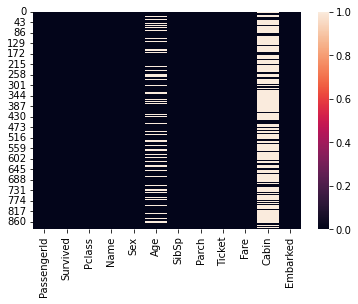

In [147]:
sns.heatmap(df.isnull())

In [148]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

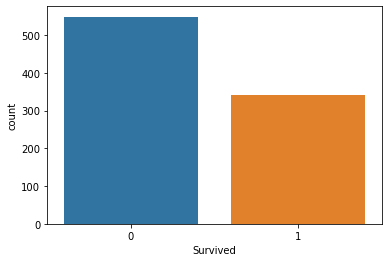

In [149]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

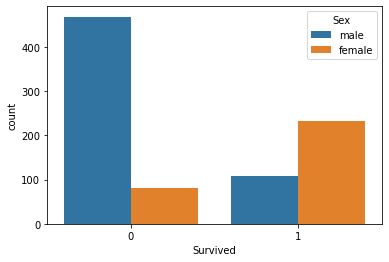

In [150]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

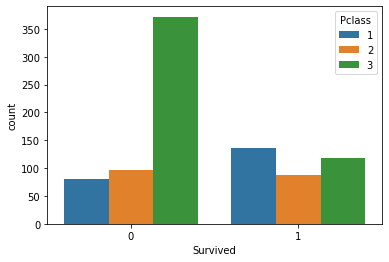

In [151]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

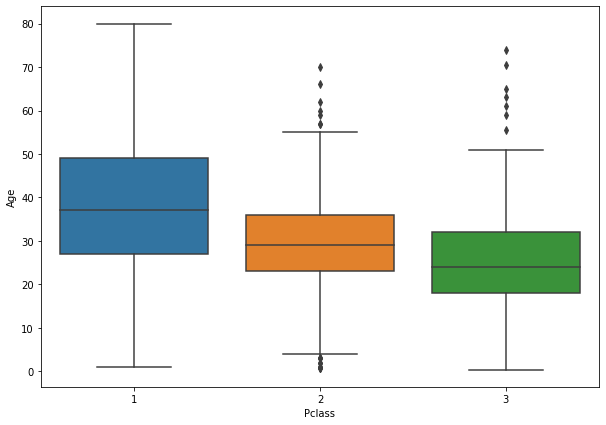

In [152]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [153]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [154]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

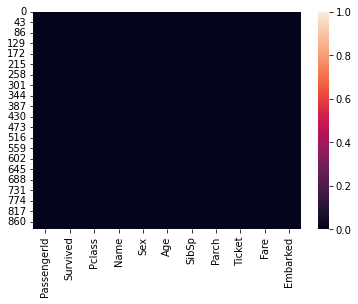

In [155]:
sns.heatmap(df.isnull())

In [156]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [157]:
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [158]:
embark = pd.get_dummies(df['Embarked'],drop_first=False)

In [159]:
df = pd.concat([df,embark],axis=1)
df.drop('Embarked',axis=1,inplace=True)

In [160]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X= df.drop('Survived',axis=1)
y= df['Survived']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dtree= DecisionTreeClassifier()

In [166]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [168]:
pred= dtree.predict(X_test)

In [169]:
pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1], dtype=int64)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       154
           1       0.75      0.64      0.69       114

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [173]:
confusion_matrix(y_test, pred)

array([[130,  24],
       [ 41,  73]], dtype=int64)

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc= RandomForestClassifier(n_estimators=600)

In [176]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [177]:
pred = rfc.predict(X_test)

In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.79      0.71      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [179]:
confusion_matrix(y_test, pred)

array([[133,  21],
       [ 33,  81]], dtype=int64)